In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 20)
import warnings
warnings.filterwarnings('ignore')

# Reading and Exploring the Data

In [3]:
# Reading the data
df = pd.read_excel('superstore_orders.xlsx')

In [4]:
# Basic overview of data
print("Shape of data ", df.shape)
print("\n\n ########################### \n\n")
print(df.describe())
print("\n\n ########################### \n\n")
print(df.describe(include = "object"))
print("\n\n ########################### \n\n")
df.head()

Shape of data  (7385, 20)


 ########################### 


            Row ID       Order ID  Sales Agent ID   Postal Code         Sales  \
count  7385.000000    7385.000000     7334.000000   7375.000000   7385.000000   
mean   4980.283819  134703.678944       23.350014  55000.195797    233.399052   
std    2913.972271   20117.779217       15.445723  32003.875787    648.523613   
min       1.000000  100006.000000        2.000000   1040.000000      0.556000   
25%    2436.000000  117212.000000        5.000000  22304.000000     17.220000   
50%    4979.000000  134054.000000       27.500000  55407.000000     54.384000   
75%    7524.000000  152156.000000       37.000000  90004.000000    211.246000   
max    9993.000000  169971.000000       49.000000  99301.000000  22638.480000   

          Quantity        Cost%  
count  7385.000000  7385.000000  
mean      3.788084     0.204895  
std       2.216888     0.174531  
min       1.000000     0.100000  
25%       2.000000     0.100000  
50%   

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Sales Agent ID,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Cost%
0,1,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,16.0,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.10
1,2,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,16.0,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.10
2,3,138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,4.0,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.10
3,4,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,9.0,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45
4,5,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,9.0,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20


In [5]:
# Getting unique counts within a feature and getting null value counts within a feature

# Null Values
print("NULL VALUES EXPLORATION")
print("\n")
columns = list(df.columns)
for i in columns:
    print("{} has ".format(i)+str(df[i].isnull().sum())+ " null Values")
print("\n\n")

# Unique values
print("UNIQUE VALUES EXPLORATION")
print("\n")
columns = list(df.columns)
for i in columns:
    print("{} has ".format(i)+str(df[i].nunique())+ " unique Values")
    
df['Order ID'] = df['Order ID'].astype('str')
df['City'] = df['City'].astype('str')

NULL VALUES EXPLORATION


Row ID has 0 null Values
Order ID has 0 null Values
Order Date has 0 null Values
Ship Date has 0 null Values
Ship Mode has 0 null Values
Customer ID has 0 null Values
Customer Name has 0 null Values
Sales Agent ID has 51 null Values
Country/Region has 0 null Values
City has 0 null Values
State has 0 null Values
Postal Code has 10 null Values
Region has 0 null Values
Product ID has 0 null Values
Category has 0 null Values
Sub-Category has 0 null Values
Product Name has 0 null Values
Sales has 0 null Values
Quantity has 0 null Values
Cost% has 0 null Values



UNIQUE VALUES EXPLORATION


Row ID has 7385 unique Values
Order ID has 3678 unique Values
Order Date has 1012 unique Values
Ship Date has 1094 unique Values
Ship Mode has 4 unique Values
Customer ID has 786 unique Values
Customer Name has 786 unique Values
Sales Agent ID has 46 unique Values
Country/Region has 1 unique Values
City has 482 unique Values
State has 47 unique Values
Postal Code has 575 unique 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          7385 non-null   int64         
 1   Order ID        7385 non-null   object        
 2   Order Date      7385 non-null   datetime64[ns]
 3   Ship Date       7385 non-null   datetime64[ns]
 4   Ship Mode       7385 non-null   object        
 5   Customer ID     7385 non-null   object        
 6   Customer Name   7385 non-null   object        
 7   Sales Agent ID  7334 non-null   float64       
 8   Country/Region  7385 non-null   object        
 9   City            7385 non-null   object        
 10  State           7385 non-null   object        
 11  Postal Code     7375 non-null   float64       
 12  Region          7385 non-null   object        
 13  Product ID      7385 non-null   object        
 14  Category        7385 non-null   object        
 15  Sub-

# Basic Data Pre Processing and Feature Selection

We wo't be needing all the features in our EDA and K means clustering. We can straight away some of them.We will filter our below mentioned features.

* Sales Agent ID (Because we will perform EDA in customer perspective)

*  Postal Code

*  Region

*  Sub-Category

*  Cost%

Based on our requirement we can remove other features in the 2nd iteration if needed.


In [7]:
df_updated = df.drop(['Sales Agent ID', 'Postal Code', 'Region', 'Cost%'], axis = 1)

In [8]:
df_updated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
0,1,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2
1,2,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2
3,4,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5
4,5,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2


# EDA

In [9]:
df_updated['Total Sales'] = df['Sales'] * df['Quantity']

In [10]:
df_updated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Total Sales
0,1,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,523.9200
1,2,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2195.8200
2,3,138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,29.2400
3,4,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,4787.8875
4,5,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,44.7360


Text(0, 0.5, 'Count')

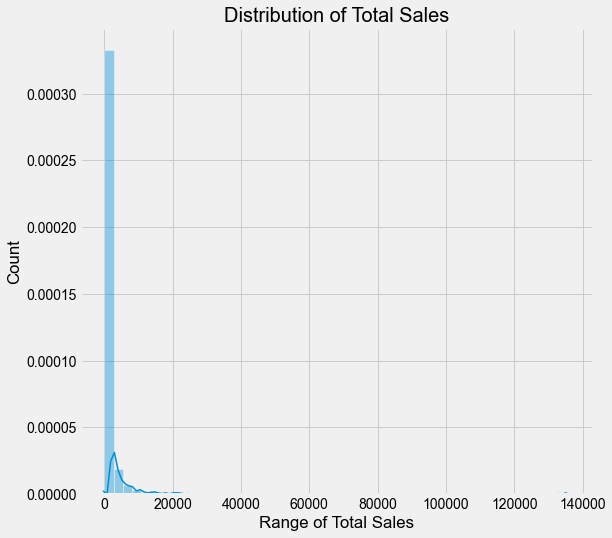

In [11]:
# Distribution of total sales

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_updated['Total Sales'])
plt.title('Distribution of Total Sales', fontsize = 20)
plt.xlabel('Range of Total Sales')
plt.ylabel('Count')


# plt.subplot(1, 2, 2)
# sns.set(style = 'whitegrid')
# sns.distplot(data['Age'], color = 'red')
# plt.title('Distribution of Age', fontsize = 20)
# plt.xlabel('Range of Age')
# plt.ylabel('Count')
# plt.show()

#### Inference
We can clearly see that the majority of the sales that are made lies in between 0 - 20K 

In [12]:
# Getting number of orders details
Multi_index_keys = df_updated.groupby(['Customer ID', 'Order ID']).size().keys()

#Preparing a dictionary to keep track of unique number of orders
dict_orders = {}
for i in Multi_index_keys:
    if i[0] not in dict_orders:
        dict_orders[i[0]] = 1
    else:
        dict_orders[i[0]] += 1
        
dict_orders


df_total_items = pd.DataFrame(df_updated.groupby(by = 'Customer ID', as_index = False).agg({'Order ID':'count', 'Total Sales' : 'sum'}))
df_total_items['Number of Total Items'] = df_total_items['Order ID']
df_total_items = df_total_items.drop('Order ID', axis = 1)
df_total_items.head()

d = {'Customer ID':list(dict_orders.keys()), 'Number Of Orders':list(dict_orders.values())}
df_number_of_orders = pd.DataFrame(data = d)
df_number_of_orders = df_number_of_orders.rename(columns={'Customer ID': 'newName1'})


df_combined = pd.concat([df_number_of_orders, df_total_items], axis = 1)
df_combined = df_combined.drop(['newName1'], axis = 1)
df_combined.head()


,Number Of Orders,Customer ID,Total Sales,Number of Total Items
0,4,AA-10315,14961.444,9
1,7,AA-10375,2267.678,10
2,4,AA-10480,5493.936,12
3,5,AA-10645,22901.935,17
4,3,AB-10015,1984.480,6


Text(0, 0.5, 'Count')

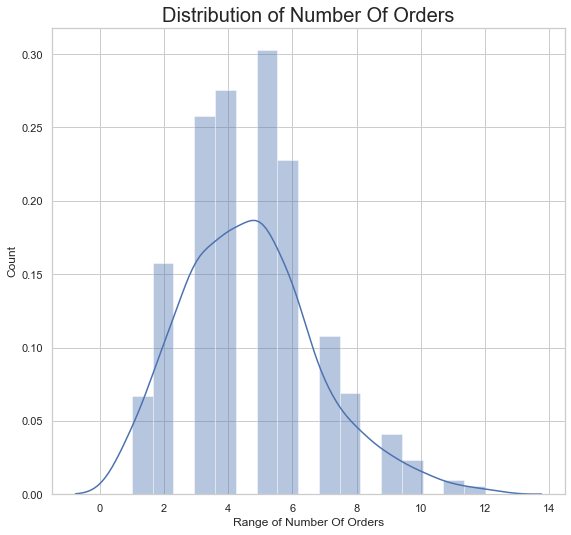

In [13]:
# Distribution of number of orders placed by the Customers.

plt.subplot(1, 2, 1)
sns.distplot(df_combined['Number Of Orders'])
plt.title('Distribution of Number Of Orders', fontsize = 20)
plt.xlabel('Range of Number Of Orders')
plt.ylabel('Count')





Text(0, 0.5, 'Count')

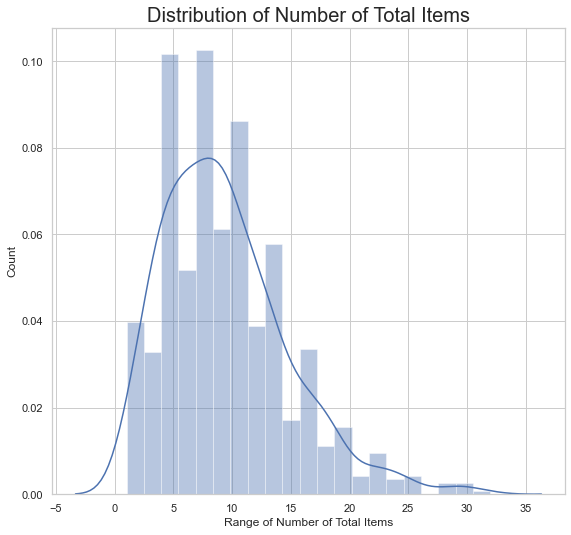

In [14]:
# Distribution of number of Items purchased by the Customers.
plt.subplot(1, 2, 1)
sns.distplot(df_combined['Number of Total Items'])
plt.title('Distribution of Number of Total Items', fontsize = 20)
plt.xlabel('Range of Number of Total Items')
plt.ylabel('Count')


In [15]:
df_combined[df_combined['Number of Total Items'] == 32]

,Number Of Orders,Customer ID,Total Sales,Number of Total Items
345,11,JD-15895,47401.524,32


#### Inference
With the above graph it is helpful to find about the behaviours of the various Customers. 

Few More plots I need to plot.

Number of Unique orders per State 

Number of Unique Customers per State (It will be helpful in budget allocating and targeting audience)

Sales per State

Understanding the behaviour of the top 5 state's (Criteria - Highest sales) customers by plotting a boxplot (Number of orders by unique customers vs State) - I will count number of items per unique customers per state {Top 5 states}




Text(0.5, 1.0, 'Number of Unique Customers per State')

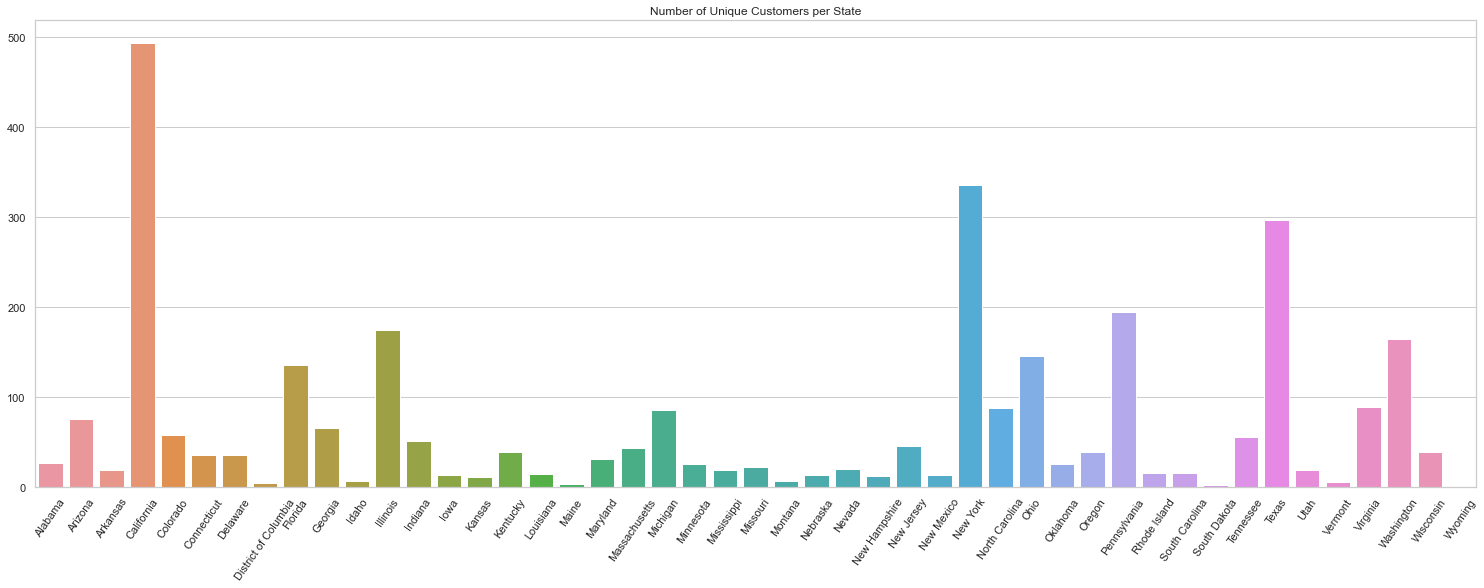

In [16]:
# Getting unique number of customers per state
df_customers_per_state = df_updated.groupby('State').apply(lambda x: len(x['Customer ID'].unique()))
dict_customers_per_state = dict(df_customers_per_state)
states = list(dict_customers_per_state.keys())
Number_of_customers = list(dict_customers_per_state.values())

plt.figure(figsize = (23,8))

sns.barplot(x=states, y=Number_of_customers)

plt.xticks(rotation=55)
plt.title("Number of Unique Customers per State")

Text(0.5, 1.0, 'Number of Unique Orders per State')

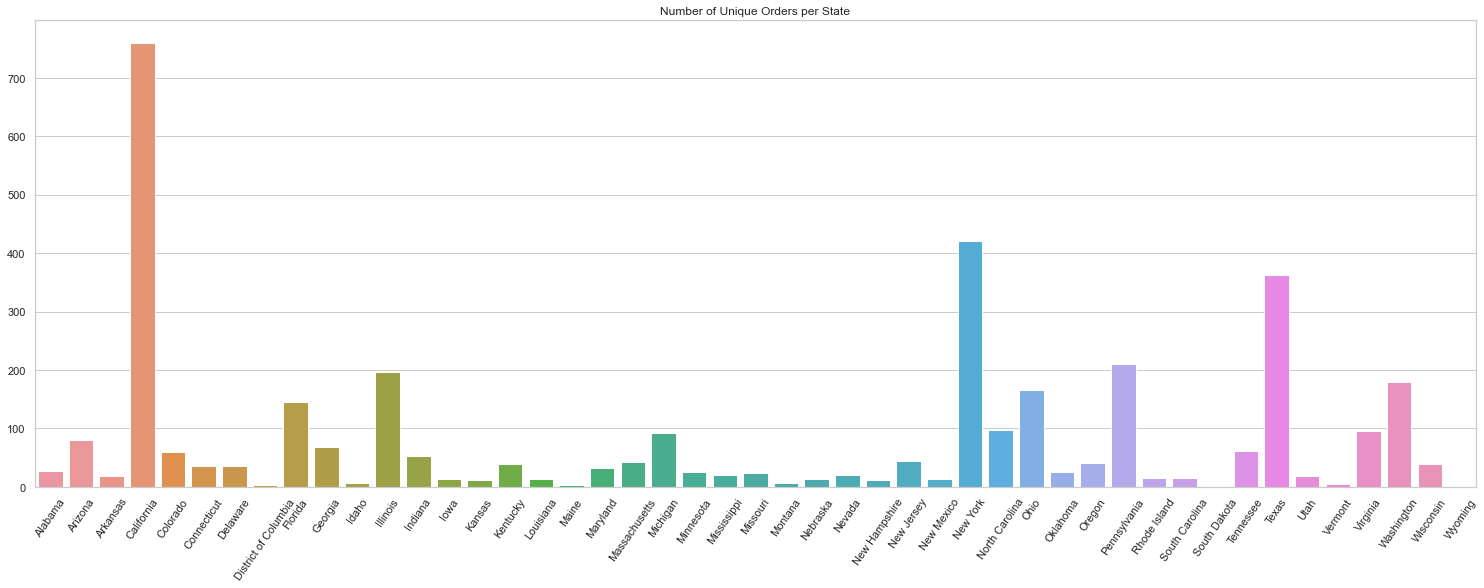

In [17]:
# Getting unique number of Orders per state
df_orders_per_state = df_updated.groupby('State').apply(lambda x: len(x['Order ID'].unique()))
dict_orders_per_state = dict(df_orders_per_state)
states = list(dict_orders_per_state.keys())
Number_of_orders = list(dict_orders_per_state.values())

plt.figure(figsize = (23,8))

sns.barplot(x=states, y=Number_of_orders)

plt.xticks(rotation=55)
plt.title("Number of Unique Orders per State")

Text(0.5, 1.0, 'Total Sales per State')

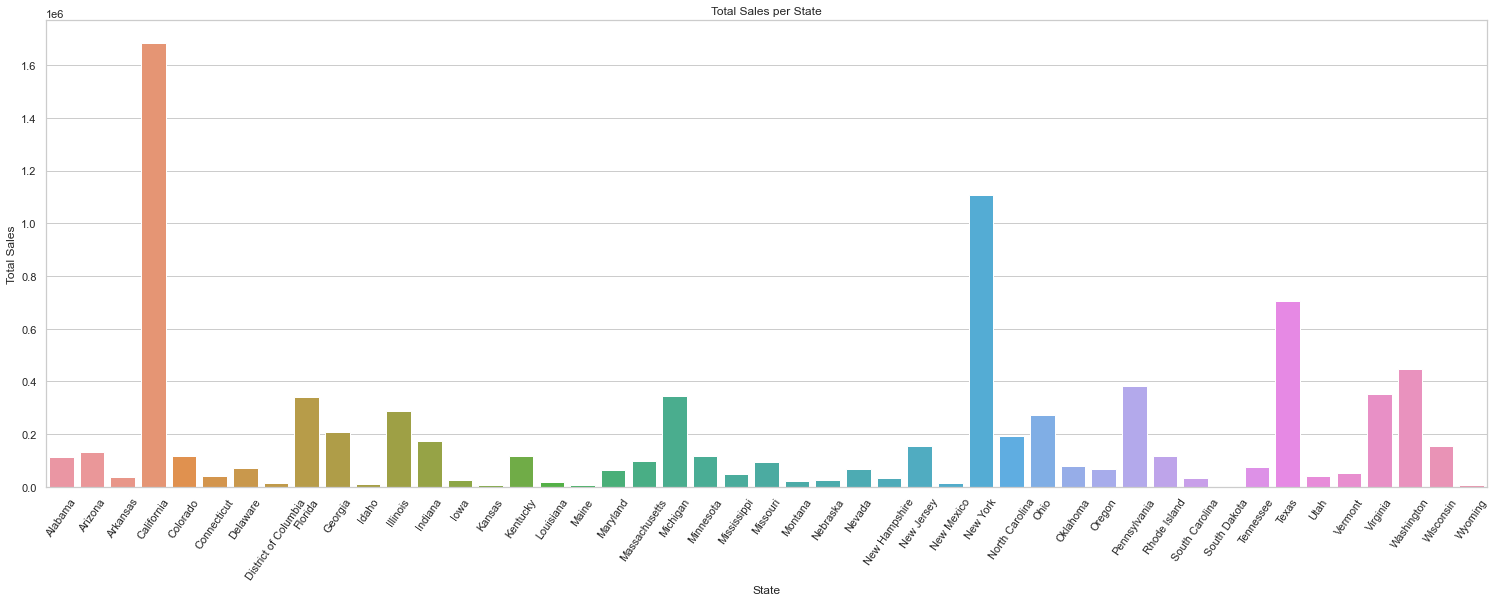

In [18]:
df_total_sales_per_state = df_updated.groupby(by='State', as_index=False).agg({'Total Sales' : 'sum'})

plt.figure(figsize = (23,8))
sns.barplot(x='State', y='Total Sales', data=df_total_sales_per_state)
plt.xticks(rotation=55)
plt.title("Total Sales per State")

In [19]:
'''

Understanding the behaviour of the top 5 state's (Criteria - Highest sales) customers by plotting a boxplot 
(Number of orders by unique customers vs State) - I will count number of orders/number of items {need to decide which to take} 
per unique customers per state {Top 5 states}
'''

# Selecting top 5 states

top_5_states = df_total_sales_per_state.sort_values(by=['Total Sales']).tail()
top_5_states = top_5_states['State'].values
# df.sort_values(by=['col1'])



In [20]:
df_total_items_per_customer_per_state = df_updated.groupby(by=['State', 'Customer ID']).size()
df_total_items_per_customer_per_state_keys = df_updated.groupby(by=['State', 'Customer ID']).size().keys()


states_ = []
total_items_per_customer_per_state = []

for i, j in df_total_items_per_customer_per_state_keys:
    states_.append(i)
    total_items_per_customer_per_state.append(df_total_items_per_customer_per_state[i][j])

print(len(states_), len(total_items_per_customer_per_state))


df_final_total_items_per_customer_per_state = pd.DataFrame({
    'State': states_,
    'Number of items' : total_items_per_customer_per_state
})

df_final_total_items_per_customer_per_state.head()



3133 3133


,State,Number of items
0,Alabama,1
1,Alabama,3
2,Alabama,1
3,Alabama,3
4,Alabama,1


['Pennsylvania' 'Washington' 'Texas' 'New York' 'California']


Text(0.5, 1.0, 'Variability within orders for Top 5 States')

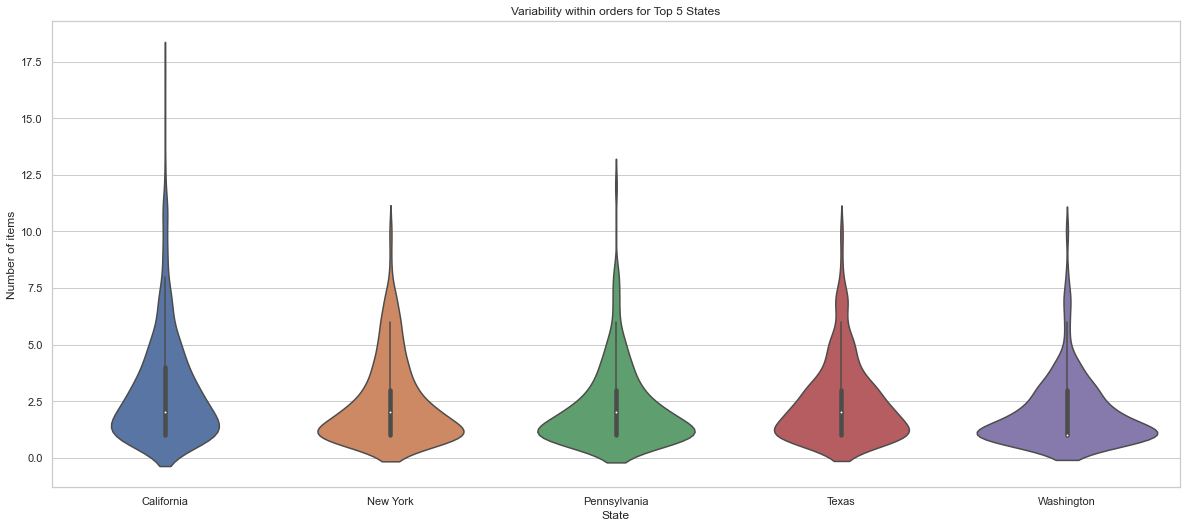

In [21]:
print(top_5_states)
df_final_total_items_per_customer_per_state_top_5 = df_final_total_items_per_customer_per_state[df_final_total_items_per_customer_per_state['State'].isin(top_5_states)]
df_final_total_items_per_customer_per_state_top_5.tail(100)

# Plotting box plot
sns.violinplot(x='State', y='Number of items', data=df_final_total_items_per_customer_per_state_top_5)
plt.title("Variability within orders for Top 5 States")

# Starting K - Means clustering

# Preparing data for our K - Means clustering

##### Columns I will consider:
Total number of unique Orders

Total number of Products in all the orders

Total number of cities

Total Sales

In [51]:
# Getting number of orders details
Multi_index_keys = df_updated.groupby(['Customer ID', 'Order ID']).size().keys()

#Preparing a dictionary to keep track of unique number of orders
dict_orders = {}
for i in Multi_index_keys:
    if i[0] not in dict_orders:
        dict_orders[i[0]] = 1
    else:
        dict_orders[i[0]] += 1
        
dict_orders

{'AA-10315': 4,
 'AA-10375': 7,
 'AA-10480': 4,
 'AA-10645': 5,
 'AB-10015': 3,
 'AB-10060': 4,
 'AB-10105': 5,
 'AB-10150': 3,
 'AB-10165': 6,
 'AB-10255': 6,
 'AB-10600': 3,
 'AC-10420': 2,
 'AC-10450': 5,
 'AC-10615': 3,
 'AC-10660': 5,
 'AD-10180': 6,
 'AF-10870': 5,
 'AF-10885': 4,
 'AG-10270': 5,
 'AG-10300': 3,
 'AG-10330': 1,
 'AG-10390': 4,
 'AG-10495': 7,
 'AG-10525': 4,
 'AG-10675': 3,
 'AG-10765': 3,
 'AG-10900': 7,
 'AH-10030': 6,
 'AH-10075': 6,
 'AH-10120': 4,
 'AH-10195': 2,
 'AH-10210': 5,
 'AH-10465': 4,
 'AH-10585': 2,
 'AH-10690': 12,
 'AI-10855': 6,
 'AJ-10780': 5,
 'AJ-10795': 6,
 'AJ-10945': 5,
 'AJ-10960': 2,
 'AM-10360': 3,
 'AM-10705': 6,
 'AO-10810': 1,
 'AP-10720': 7,
 'AP-10915': 8,
 'AR-10345': 2,
 'AR-10405': 2,
 'AR-10510': 4,
 'AR-10540': 5,
 'AR-10570': 1,
 'AR-10825': 5,
 'AS-10045': 4,
 'AS-10090': 7,
 'AS-10135': 1,
 'AS-10225': 3,
 'AS-10240': 6,
 'AS-10285': 5,
 'AS-10630': 6,
 'AT-10435': 5,
 'AT-10735': 6,
 'AW-10840': 2,
 'AW-10930': 5,
 'AY-10

In [52]:
df_total_items = pd.DataFrame(df_updated.groupby(by = 'Customer ID', as_index = False).agg({'Order ID':'count', 'Total Sales' : 'sum'}))
df_total_items['Number of Total Items'] = df_total_items['Order ID']
df_total_items = df_total_items.drop('Order ID', axis = 1)
df_total_items.head()

,Customer ID,Total Sales,Number of Total Items
0,AA-10315,14961.444,9
1,AA-10375,2267.678,10
2,AA-10480,5493.936,12
3,AA-10645,22901.935,17
4,AB-10015,1984.480,6


In [53]:
d = {'Customer ID':list(dict_orders.keys()), 'Number Of Orders':list(dict_orders.values())}
df_number_of_orders = pd.DataFrame(data = d)
df_number_of_orders = df_number_of_orders.rename(columns={'Customer ID': 'newName1'})

In [54]:
df_number_of_orders.head()

,newName1,Number Of Orders
0,AA-10315,4
1,AA-10375,7
2,AA-10480,4
3,AA-10645,5
4,AB-10015,3


In [55]:
df_combined = pd.concat([df_number_of_orders, df_total_items], axis = 1)

In [56]:
df_combined.shape

(786, 5)

In [57]:
df_combined = df_combined.drop(['newName1'], axis = 1)

In [58]:
df_combined.head()

,Number Of Orders,Customer ID,Total Sales,Number of Total Items
0,4,AA-10315,14961.444,9
1,7,AA-10375,2267.678,10
2,4,AA-10480,5493.936,12
3,5,AA-10645,22901.935,17
4,3,AB-10015,1984.480,6


In [59]:
df_combined = df_combined.drop(['Customer ID'], axis = 1)
df_combined = df_combined.drop(['Total Sales'], axis = 1)

# Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

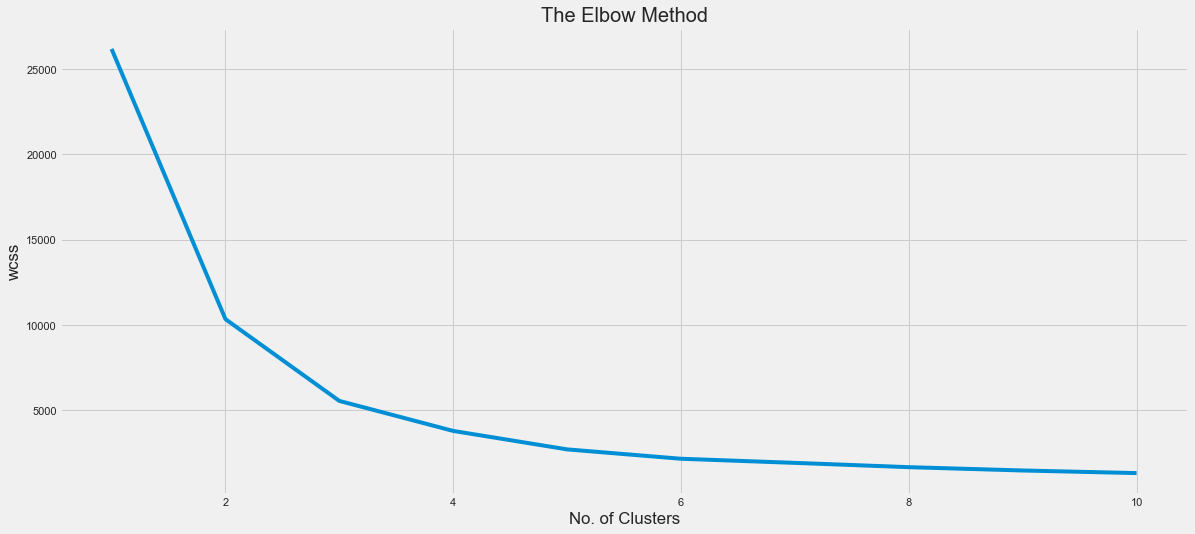

In [60]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df_combined)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

#### Inference from above plot.

It is evident that the optimal number of ckustrs will be **5**.

In [79]:
# Fitting our data with 5 clusters
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 600, n_init = 10, random_state = 0)
y_means = km.fit_predict(df_combined)


In [80]:
len(y_means)

786

In [81]:
df_combined.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [64]:
df_combined = df_combined.to_numpy()

In [82]:
df_combined.shape

(786, 2)

### Visualizing the clusters

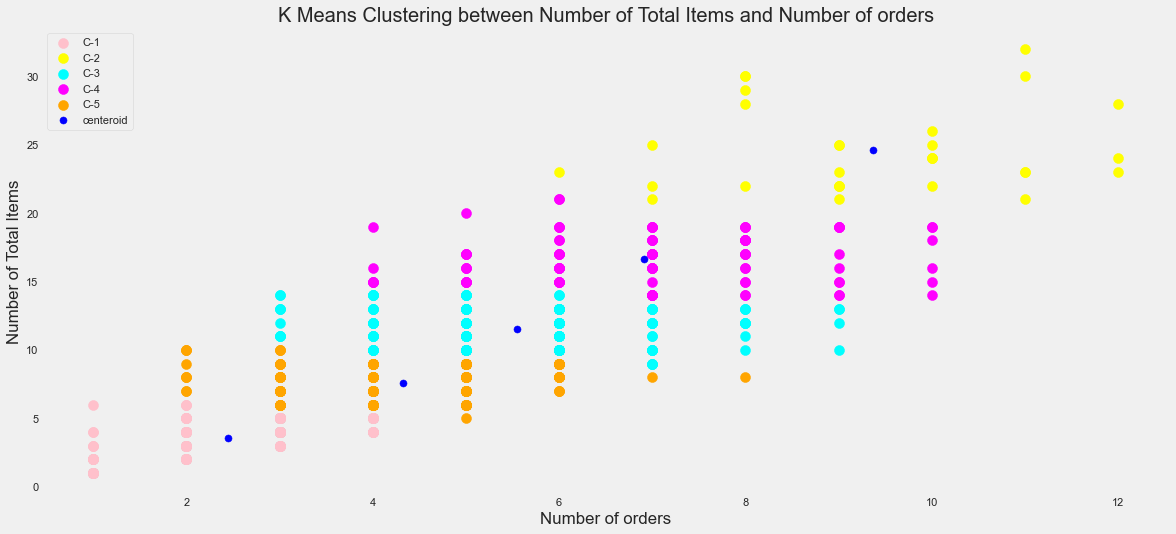

In [83]:
plt.scatter(df_combined[y_means == 0, 0], df_combined[y_means == 0, 1], s = 100, c = 'pink', label = 'C-1')
plt.scatter(df_combined[y_means == 1, 0], df_combined[y_means == 1, 1], s = 100, c = 'yellow', label = 'C-2')
plt.scatter(df_combined[y_means == 2, 0], df_combined[y_means == 2, 1], s = 100, c = 'cyan', label = 'C-3')
plt.scatter(df_combined[y_means == 3, 0], df_combined[y_means == 3, 1], s = 100, c = 'magenta', label = 'C-4')
plt.scatter(df_combined[y_means == 4, 0], df_combined[y_means == 4, 1], s = 100, c = 'orange', label = 'C-5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Number of Total Items and Number of orders', fontsize = 20)
plt.xlabel('Number of orders')
plt.ylabel('Number of Total Items')
plt.legend()
plt.grid()
plt.show()

#### Taking one step further
Now we will get all the customer IDs together which falls within the same cluster and will then use that information for our business purpose

In [70]:
df_updated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Country/Region,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Total Sales
0,1,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,523.9200
1,2,152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2195.8200
2,3,138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,29.2400
3,4,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,4787.8875
4,5,108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,44.7360


In [74]:
df_final_business_info = pd.DataFrame()
df_final_business_info['Customer ID'] = df_number_of_orders['newName1']
df_final_business_info['Cluster ID'] = y_means

In [78]:
df_final_business_info.groupby(by='Cluster ID').size()


Cluster ID
0    205
1     30
2    198
3    104
4    249
dtype: int64